In [1]:
# import os
# import sys
# import utility
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [2]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

In [3]:
from library import *
import utility

importing python modules : http://effbot.org/zone/import-confusion.htm

In [4]:
os.getcwd()

'C:\\Users\\hisahoo.ISC\\Desktop\\Datascience\\Weekly-DS-meeting\\MLSebastianRaschka'

#### read file from local directory

In [5]:
data_dir = "dataset"
os.listdir(os.getcwd()+os.sep+data_dir)

['housing.data.txt', 'iris.csv', 'iris.data.txt']

In [6]:
df = pd.read_csv(data_dir+os.sep+"iris.data.txt", header=None)

In [7]:
print(df.shape)
df.head()
df.tail()

(150, 5)


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [9]:
type(df.loc[:, 4]) # pandas.core.series.Series
print(np.unique(df.iloc[:, 4])) # loc and iloc will give same result here. because column names are integer
#####np.bincount(df.iloc[:, 4]) # bin count is only for integer labels.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
df.iloc[:, 4].count()

150

In [11]:
df.loc[:, 4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64

In [12]:
label_encoder = LabelEncoder()
label_encoder.fit(df.loc[:, 4])
df["target"] = label_encoder.transform(df.loc[:, 4])

In [13]:
print(df.head())
print(df.tail())

     0    1    2    3            4  target
0  5.1  3.5  1.4  0.2  Iris-setosa       0
1  4.9  3.0  1.4  0.2  Iris-setosa       0
2  4.7  3.2  1.3  0.2  Iris-setosa       0
3  4.6  3.1  1.5  0.2  Iris-setosa       0
4  5.0  3.6  1.4  0.2  Iris-setosa       0
       0    1    2    3               4  target
145  6.7  3.0  5.2  2.3  Iris-virginica       2
146  6.3  2.5  5.0  1.9  Iris-virginica       2
147  6.5  3.0  5.2  2.0  Iris-virginica       2
148  6.2  3.4  5.4  2.3  Iris-virginica       2
149  5.9  3.0  5.1  1.8  Iris-virginica       2


In [14]:
np.unique(df["target"])

array([0, 1, 2])

In [15]:
np.bincount(df.target)

array([50, 50, 50], dtype=int64)

In [16]:
df["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [17]:
#mapping = {"Iris-setosa":0, "Iris-virginica":1, "Iris-versicolor":2}
#mapping
#df.iloc[:, 4].map(mapping)
#df.replace({"4": mapping})
#mapping doesn't work

<b> There are three categories each of value_count 50, total counts 150 </b>

#### Read file from sklearn datasets

In [18]:
#iris = datasets.load_iris()
# X = iris.data[:, [2, 3]] # only take petal length, petal width
# y = iris.target

In [19]:
#print(type(iris.data), iris.data.shape)   # <class 'numpy.ndarray'> (150, 4)
#print(type(iris.target), iris.target.shape) # <class 'numpy.ndarray'> (150,)

In [20]:
X = df.loc[:, [2,3]]
y = df.target

In [21]:
print(type(X), X.shape)   
print(type(y), y.shape) 

<class 'pandas.core.frame.DataFrame'> (150, 2)
<class 'pandas.core.series.Series'> (150,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

##### what is difference between vstack and hstack???

In [48]:
a = np.array((1,2,3))
b = np.array((2,3,4))

In [51]:
a

array([1, 2, 3])

In [49]:
print(a.shape, b.shape)

(3,) (3,)


In [55]:
print(np.hstack((a,b)).shape)
np.hstack((a,b))

(6,)


array([1, 2, 3, 2, 3, 4])

In [56]:
print(np.vstack((a,b)).shape)
np.vstack((a,b))

(2, 3)


array([[1, 2, 3],
       [2, 3, 4]])

In [25]:
y_train.shape
y_test.shape

(45,)

In [26]:
X_train_std.shape
X_test_std.shape

(45, 2)

In [27]:
lr1 = LogisticRegression(C=100.0, random_state=1)
lr1.fit(X_train_std, y_train)
lr1

C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
import sklearn; sklearn.__version__

'0.20.0'

<b> due to above warnings defined a new model <br>
solver : str, {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default: 'liblinear'. -----> lbfgs <br>
multi_class : str, {'ovr', 'multinomial', 'auto'}, default: 'ovr' -----> auto
</b>

In [28]:
lr = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="auto")
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

<b> This plot is different from book, because different solver and multi_class </b>

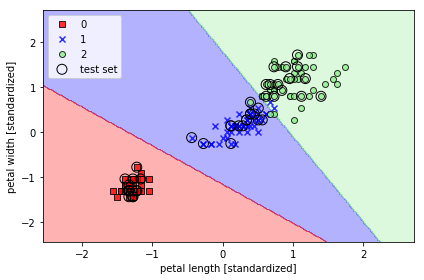

In [29]:
utility.plot_decision_regions_with_test(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

#utility.plot_decision_regions(X_combined_std, y_combined, classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

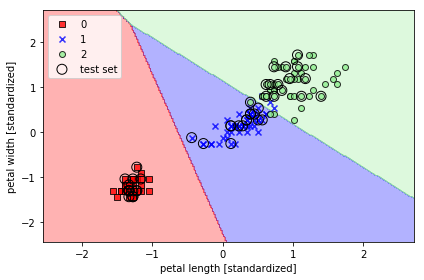

In [30]:
utility.plot_decision_regions_with_test(X_combined_std, y_combined, classifier=lr1, test_idx=range(105, 150))

#utility.plot_decision_regions(X_combined_std, y_combined, classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [31]:
lr1.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [32]:
lr1.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [33]:
lr1.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [40]:
lr1.score(X_train, y_train)

0.3333333333333333

In [41]:
lr1.score(X_test, y_test)

0.3333333333333333

In [34]:
lr1.predict(X_test_std[:3, :])

array([2, 0, 0])

In [35]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [36]:
print(X_test_std[0, :], X_test_std[0, :].shape) # this is single sample, shape should be (1,2)
print(X_test_std[0, :].reshape(1, -1), X_test_std[0, :].reshape(1,-1).shape)

[0.89820289 1.44465434] (2,)
[[0.89820289 1.44465434]] (1, 2)


```
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
```

In [37]:
help(lr1)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solv

In [43]:
print(dir(lr1))

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_estimator_type', '_get_param_names', '_predict_proba_lr', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'max_iter', 'multi_class', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


In [44]:
lr1.n_iter_

array([9], dtype=int32)

In [45]:
lr1.coef_

array([[-5.61119214, -4.3095919 ],
       [ 2.38375195, -2.04552965],
       [ 9.51463313,  5.40199177]])

In [46]:
lr1.classes_

array([0, 1, 2])

In [47]:
lr1.intercept_

array([-5.83309891, -0.75660259, -9.21677488])